In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos-classification/Merge Ddos Attack classification/UDP FLOOD/UDP flood_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/PSHACK FLOOD/DDoS_PSHACK_FLOOD_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/SLOWLORIS/SlowLoris_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/HTTP FLOOD/HTTP flood_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/ICMP FRAGMENTATION/DDoS-ICMP_Fragmentation_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/ICMP FLOOD/ICMP flood_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/ACK FRAGMENTATION/ACK fragmentation_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/RSTFINFLOOD/DDoS_RSTFINFLOOD_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classification/TCP FLOOD/TCP flood_merge.csv
/kaggle/input/ddos-classification/Merge Ddos Attack classificati

In [2]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.6 MB/s eta 0:00:0000:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# path

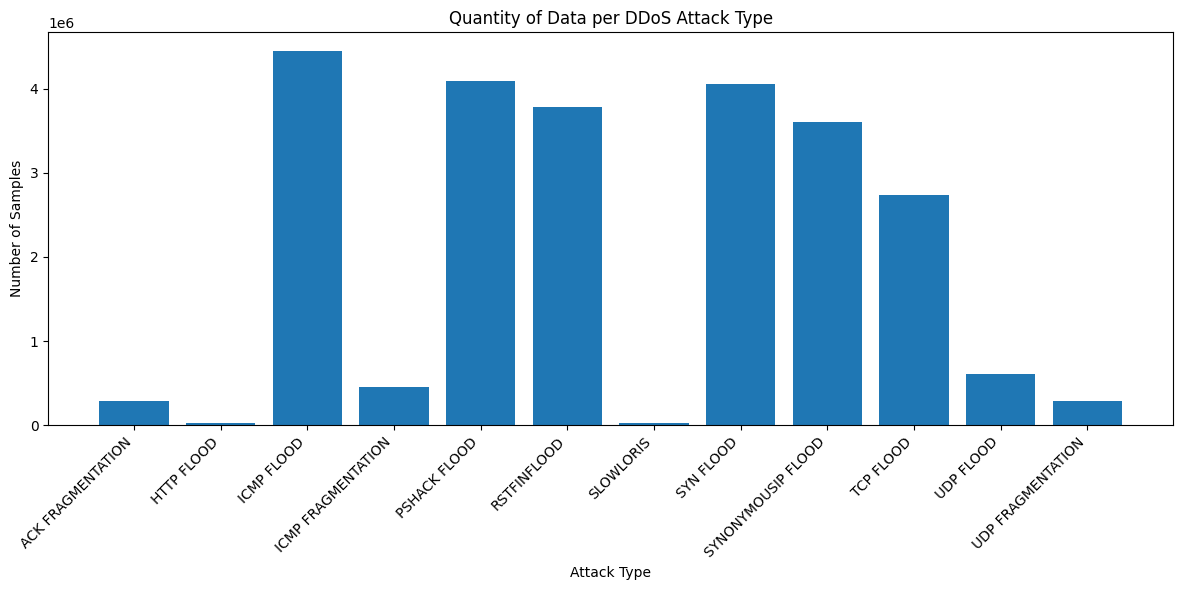

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your attack files and names
attack_files = {
    "ACK FRAGMENTATION":"/kaggle/input/ddos-classification/Merge Ddos Attack classification/ACK FRAGMENTATION/ACK fragmentation_merge.csv",
    "HTTP FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/HTTP FLOOD/HTTP flood_merge.csv",
    "ICMP FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/ICMP FLOOD/ICMP flood_merge.csv",
    "ICMP FRAGMENTATION": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/ICMP FRAGMENTATION/DDoS-ICMP_Fragmentation_merge.csv",
    "PSHACK FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/PSHACK FLOOD/DDoS_PSHACK_FLOOD_merge.csv",
    "RSTFINFLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/RSTFINFLOOD/DDoS_RSTFINFLOOD_merge.csv",
    "SLOWLORIS": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/SLOWLORIS/SlowLoris_merge.csv",
    "SYN FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/SYN FLOOD/SYN flood_merge.csv",
    "SYNONYMOUSIP FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/SYNONYMOUSIP FLOOD/SynonymousIP flood_merge.csv",
    "TCP FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/TCP FLOOD/TCP flood_merge.csv",
    "UDP FLOOD": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/UDP FLOOD/UDP flood_merge.csv",
    "UDP FRAGMENTATION": "/kaggle/input/ddos-classification/Merge Ddos Attack classification/UDP FRAGMENTATION/Udp_fragmentation_merge.csv"
}

# Count rows for each attack type
attack_counts = {}
for attack, path in attack_files.items():
    df = pd.read_csv(path)
    attack_counts[attack] = len(df)

# Convert to DataFrame for easy plotting
count_df = pd.DataFrame(list(attack_counts.items()), columns=["Attack Type", "Samples"])

# Plot the bar chart
plt.figure(figsize=(12,6))
plt.bar(count_df["Attack Type"], count_df["Samples"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Attack Type")
plt.ylabel("Number of Samples")
plt.title("Quantity of Data per DDoS Attack Type")
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

for attack, path in attack_files.items():
    df = pd.read_csv(path)
    print(f"{attack}: {len(df)} rows")


ACK FRAGMENTATION: 285075 rows
HTTP FLOOD: 28790 rows
ICMP FLOOD: 4445972 rows
ICMP FRAGMENTATION: 452490 rows
PSHACK FLOOD: 4094772 rows
RSTFINFLOOD: 3779761 rows
SLOWLORIS: 23426 rows
SYN FLOOD: 4059179 rows
SYNONYMOUSIP FLOOD: 3598133 rows
TCP FLOOD: 2734094 rows
UDP FLOOD: 611156 rows
UDP FRAGMENTATION: 286925 rows


# Duplicate data check

In [5]:
import pandas as pd

for attack, path in attack_files.items():
    df = pd.read_csv(path)
    # Drop first column assuming it's a serial number
    df_no_index = df.iloc[:, 1:]
    duplicate_count = df_no_index.duplicated().sum()
    print(f"{attack}: {duplicate_count} duplicate rows (ignoring first column)")


ACK FRAGMENTATION: 1319 duplicate rows (ignoring first column)
HTTP FLOOD: 0 duplicate rows (ignoring first column)
ICMP FLOOD: 3106406 duplicate rows (ignoring first column)
ICMP FRAGMENTATION: 2157 duplicate rows (ignoring first column)
PSHACK FLOOD: 2389680 duplicate rows (ignoring first column)
RSTFINFLOOD: 2553514 duplicate rows (ignoring first column)
SLOWLORIS: 0 duplicate rows (ignoring first column)
SYN FLOOD: 2223729 duplicate rows (ignoring first column)
SYNONYMOUSIP FLOOD: 2383448 duplicate rows (ignoring first column)
TCP FLOOD: 1728242 duplicate rows (ignoring first column)
UDP FLOOD: 340260 duplicate rows (ignoring first column)
UDP FRAGMENTATION: 1616 duplicate rows (ignoring first column)


# Drop duplicate data

In [6]:
for attack, path in attack_files.items():
    df = pd.read_csv(path)
    
    # Drop duplicates except the first column
    df_no_duplicates = df.drop_duplicates(subset=df.columns[1:], keep='first')
    
    print(f"{attack}: {len(df)} original rows → {len(df_no_duplicates)} after dropping duplicates")


ACK FRAGMENTATION: 285075 original rows → 283756 after dropping duplicates
HTTP FLOOD: 28790 original rows → 28790 after dropping duplicates
ICMP FLOOD: 4445972 original rows → 1339566 after dropping duplicates
ICMP FRAGMENTATION: 452490 original rows → 450333 after dropping duplicates
PSHACK FLOOD: 4094772 original rows → 1705092 after dropping duplicates
RSTFINFLOOD: 3779761 original rows → 1226247 after dropping duplicates
SLOWLORIS: 23426 original rows → 23426 after dropping duplicates
SYN FLOOD: 4059179 original rows → 1835450 after dropping duplicates
SYNONYMOUSIP FLOOD: 3598133 original rows → 1214685 after dropping duplicates
TCP FLOOD: 2734094 original rows → 1005852 after dropping duplicates
UDP FLOOD: 611156 original rows → 270896 after dropping duplicates
UDP FRAGMENTATION: 286925 original rows → 285309 after dropping duplicates


# Null check

In [7]:
for attack, path in attack_files.items():
    df = pd.read_csv(path)
    df_no_duplicates = df.drop_duplicates(subset=df.columns[1:], keep='first')
    
    # Count nulls
    null_count = df_no_duplicates.isnull().sum().sum()
    
    print(f"{attack}: {null_count} null values in data after dropping duplicates")


ACK FRAGMENTATION: 46 null values in data after dropping duplicates
HTTP FLOOD: 0 null values in data after dropping duplicates
ICMP FLOOD: 22 null values in data after dropping duplicates
ICMP FRAGMENTATION: 70 null values in data after dropping duplicates
PSHACK FLOOD: 30 null values in data after dropping duplicates
RSTFINFLOOD: 20 null values in data after dropping duplicates
SLOWLORIS: 2 null values in data after dropping duplicates
SYN FLOOD: 26 null values in data after dropping duplicates
SYNONYMOUSIP FLOOD: 24 null values in data after dropping duplicates
TCP FLOOD: 8 null values in data after dropping duplicates
UDP FLOOD: 4 null values in data after dropping duplicates
UDP FRAGMENTATION: 44 null values in data after dropping duplicates


# Drop null value row

In [8]:
for attack, path in attack_files.items():
    df = pd.read_csv(path)
    df_no_duplicates = df.drop_duplicates(subset=df.columns[1:], keep='first')
    
    # Drop null rows
    df_clean = df_no_duplicates.dropna()
    
    print(f"{attack}: {len(df_clean)} rows remaining after dropping duplicates + nulls")


ACK FRAGMENTATION: 283733 rows remaining after dropping duplicates + nulls
HTTP FLOOD: 28790 rows remaining after dropping duplicates + nulls
ICMP FLOOD: 1339555 rows remaining after dropping duplicates + nulls
ICMP FRAGMENTATION: 450298 rows remaining after dropping duplicates + nulls
PSHACK FLOOD: 1705077 rows remaining after dropping duplicates + nulls
RSTFINFLOOD: 1226237 rows remaining after dropping duplicates + nulls
SLOWLORIS: 23425 rows remaining after dropping duplicates + nulls
SYN FLOOD: 1835437 rows remaining after dropping duplicates + nulls
SYNONYMOUSIP FLOOD: 1214673 rows remaining after dropping duplicates + nulls
TCP FLOOD: 1005848 rows remaining after dropping duplicates + nulls
UDP FLOOD: 270894 rows remaining after dropping duplicates + nulls
UDP FRAGMENTATION: 285287 rows remaining after dropping duplicates + nulls


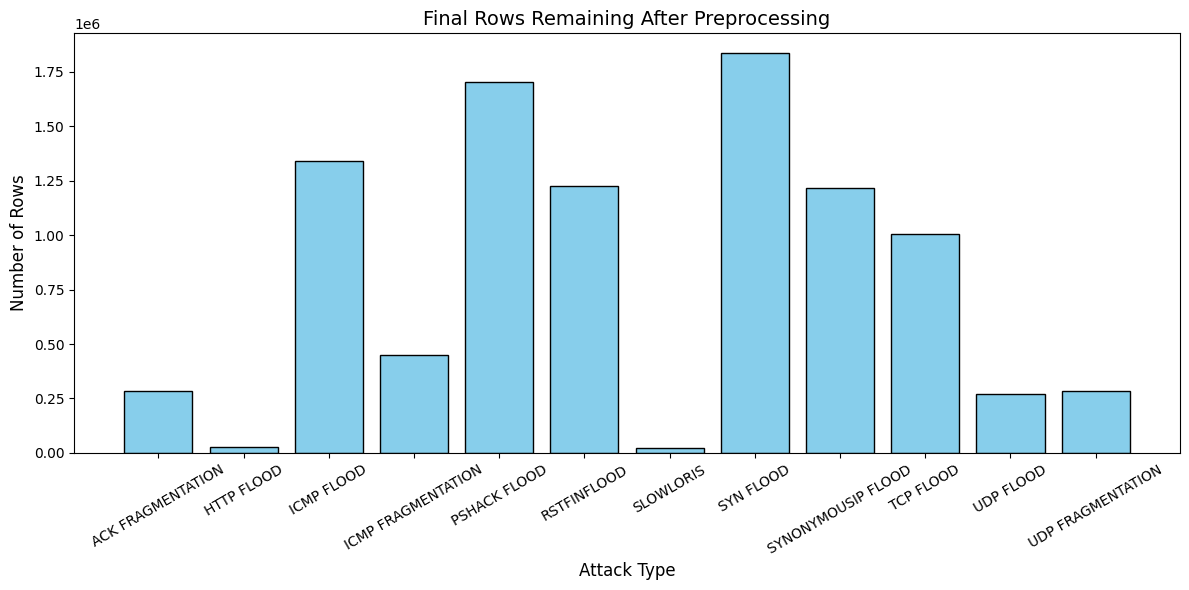

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

final_counts = {}

for attack, path in attack_files.items():
    df = pd.read_csv(path)
    
    # Drop duplicates (ignoring first column)
    df_no_duplicates = df.drop_duplicates(subset=df.columns[1:], keep='first')
    
    # Drop null rows
    df_clean = df_no_duplicates.dropna()
    
    # Save final count
    final_counts[attack] = len(df_clean)

# Convert to DataFrame for plotting
final_df = pd.DataFrame(list(final_counts.items()), columns=["Attack", "Final Rows"])
final_df


plt.figure(figsize=(12,6))
plt.bar(final_df["Attack"], final_df["Final Rows"], color="skyblue", edgecolor="black")

plt.title("Final Rows Remaining After Preprocessing", fontsize=14)
plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

TARGET = 285075   # number of rows per attack class

# List to store preprocessed DataFrames
df_list = []

# Step 1: Preprocess each attack file
for attack, path in attack_files.items():
    df = pd.read_csv(path)
    
    # Drop duplicates ignoring the first column (usually index or ID)
    df_no_duplicates = df.drop_duplicates(subset=df.columns[1:], keep='first')
    
    # Drop null rows
    df_clean = df_no_duplicates.dropna()
    
   
    # Append to list
    df_list.append(df_clean)

# Step 2: Combine all attacks into one DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Step 3: Separate features and target
X = df_combined.drop(columns=["Attack Type"])
y = df_combined["Attack Type"]

# Step 4: Clean features (replace inf and NaN just in case)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())

# Step 5: Encode target
lb = LabelEncoder()
y_encoded = lb.fit_transform(y)

# Step 6: Balance dataset
# --- Undersample classes > TARGET ---
current_counts = pd.Series(y_encoded).value_counts().to_dict()
undersample_strategy = {cls: TARGET for cls, cnt in current_counts.items() if cnt > TARGET}

if undersample_strategy:
    rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
    X_res, y_res = rus.fit_resample(X, y_encoded)
else:
    X_res, y_res = X, y_encoded

# --- SMOTE for classes < TARGET ---
post_counts = pd.Series(y_res).value_counts().to_dict()
smote_strategy = {cls: TARGET for cls, cnt in post_counts.items() if cnt < TARGET}

if smote_strategy:
    sm = SMOTE(sampling_strategy=smote_strategy, random_state=42, n_jobs=-1)
    X_balanced, y_balanced = sm.fit_resample(X_res, y_res)
else:
    X_balanced, y_balanced = X_res, y_res

print("\nFinal balanced counts per attack type:")
print(pd.Series(y_balanced).value_counts())

# Step 7: Scale features
st = StandardScaler()
X_balanced_scaled = st.fit_transform(X_balanced)

# Step 8: Decode labels back to original
y_balanced_labels = lb.inverse_transform(y_balanced)

# Step 9: Build final balanced DataFrame
balanced_df = pd.DataFrame(X_balanced_scaled, columns=X.columns)
balanced_df["Attack Type"] = y_balanced_labels

print("\nBalanced dataset preview:")
print(balanced_df.head())
print("\nCounts per attack type:")
print(balanced_df["Attack Type"].value_counts())



Final balanced counts per attack type:
0     285075
1     285075
2     285075
3     285075
4     285075
5     285075
6     285075
7     285075
8     285075
9     285075
10    285075
11    285075
Name: count, dtype: int64

Balanced dataset preview:
   Serial No  Header_Length  Protocol Type  Time_To_Live      Rate  \
0  -0.827527      -0.309659      -0.211101      0.125716 -0.544880   
1  -0.827526       0.037118      -0.211101     -0.083882 -0.502781   
2  -0.827525      -0.205626      -0.211101     -0.286896 -0.345030   
3  -0.827525      -0.155536      -0.211101     -0.267143 -0.396114   
4  -0.827524      -0.213332      -0.211101     -0.267143 -0.403390   

   fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  \
0         -0.33822        -0.515883         0.282186        -0.424949   
1         -0.33822        -0.515883         1.734869        -0.424949   
2         -0.33822        -0.543125         0.849087        -0.424949   
3         -0.33822        -0.543125   

# Stratified data split

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

# --- 1. Define test size and random state ---
test_size = 0.2   # 20% for testing, 80% for training
random_state = 0

# --- 2. Perform Stratified Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_scaled,
    y_balanced_labels,       # use balanced labels
    test_size=test_size,
    random_state=random_state,
    stratify=y_balanced_labels  # stratify on balanced target
)

# --- 3. Check the split ---
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# --- 4. Verify class distribution ---
unique_train, counts_train = np.unique(y_train, return_counts=True)
print("\nClass distribution in Training Set:")
for u, c in zip(unique_train, counts_train):
    print(f"  Class {u}: {c} samples")

unique_test, counts_test = np.unique(y_test, return_counts=True)
print("\nClass distribution in Test Set:")
for u, c in zip(unique_test, counts_test):
    print(f"  Class {u}: {c} samples")


Training set shape: (2736720, 40), (2736720,)
Test set shape: (684180, 40), (684180,)

Class distribution in Training Set:
  Class ACK fragmentation: 228060 samples
  Class DDoS-ICMP_Fragmentation: 228060 samples
  Class DDoS-PSHACK_FLOOD: 228060 samples
  Class DDoS-RSTFINFLOOD: 228060 samples
  Class HTTP flood: 228060 samples
  Class ICMP flood: 228060 samples
  Class SYN flood: 228060 samples
  Class SlowLoris: 228060 samples
  Class SynonymousIP flood: 228060 samples
  Class TCP flood: 228060 samples
  Class UDP flood: 228060 samples
  Class UDP fragmentation: 228060 samples

Class distribution in Test Set:
  Class ACK fragmentation: 57015 samples
  Class DDoS-ICMP_Fragmentation: 57015 samples
  Class DDoS-PSHACK_FLOOD: 57015 samples
  Class DDoS-RSTFINFLOOD: 57015 samples
  Class HTTP flood: 57015 samples
  Class ICMP flood: 57015 samples
  Class SYN flood: 57015 samples
  Class SlowLoris: 57015 samples
  Class SynonymousIP flood: 57015 samples
  Class TCP flood: 57015 samples
  

# Apply Gini index

=== Training Set Metrics ===
Accuracy: 1.0000
Classification Report:
                         precision    recall  f1-score   support

      ACK fragmentation       1.00      1.00      1.00    228060
DDoS-ICMP_Fragmentation       1.00      1.00      1.00    228060
      DDoS-PSHACK_FLOOD       1.00      1.00      1.00    228060
       DDoS-RSTFINFLOOD       1.00      1.00      1.00    228060
             HTTP flood       1.00      1.00      1.00    228060
             ICMP flood       1.00      1.00      1.00    228060
              SYN flood       1.00      1.00      1.00    228060
              SlowLoris       1.00      1.00      1.00    228060
     SynonymousIP flood       1.00      1.00      1.00    228060
              TCP flood       1.00      1.00      1.00    228060
              UDP flood       1.00      1.00      1.00    228060
      UDP fragmentation       1.00      1.00      1.00    228060

               accuracy                           1.00   2736720
              macro

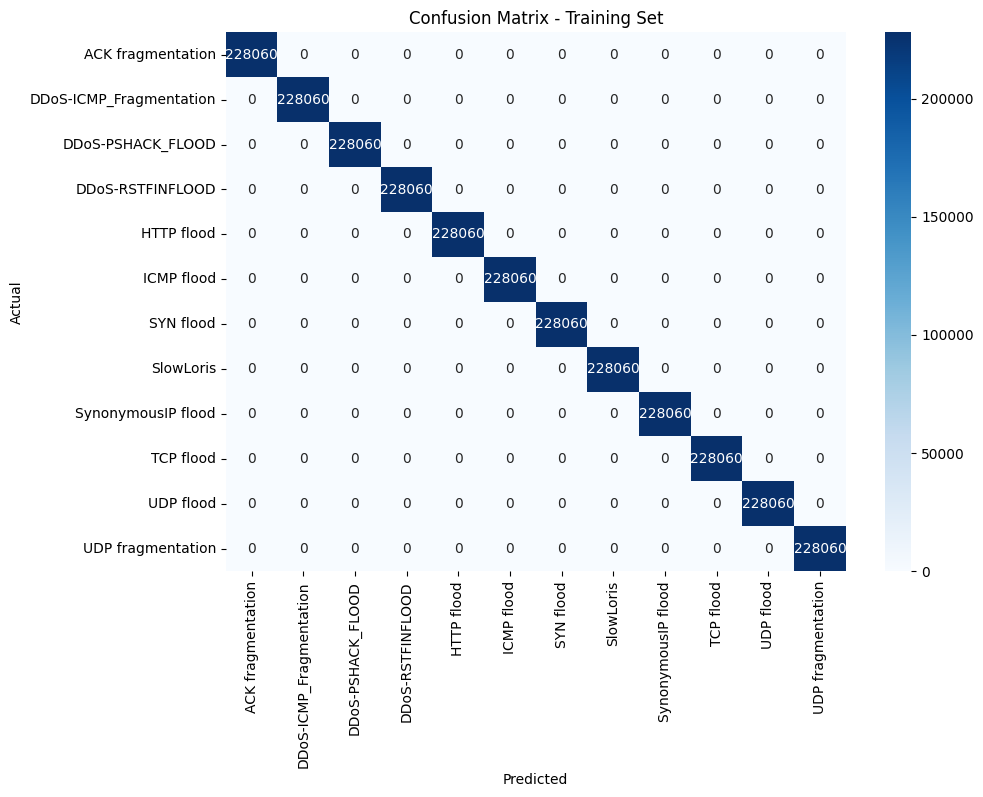

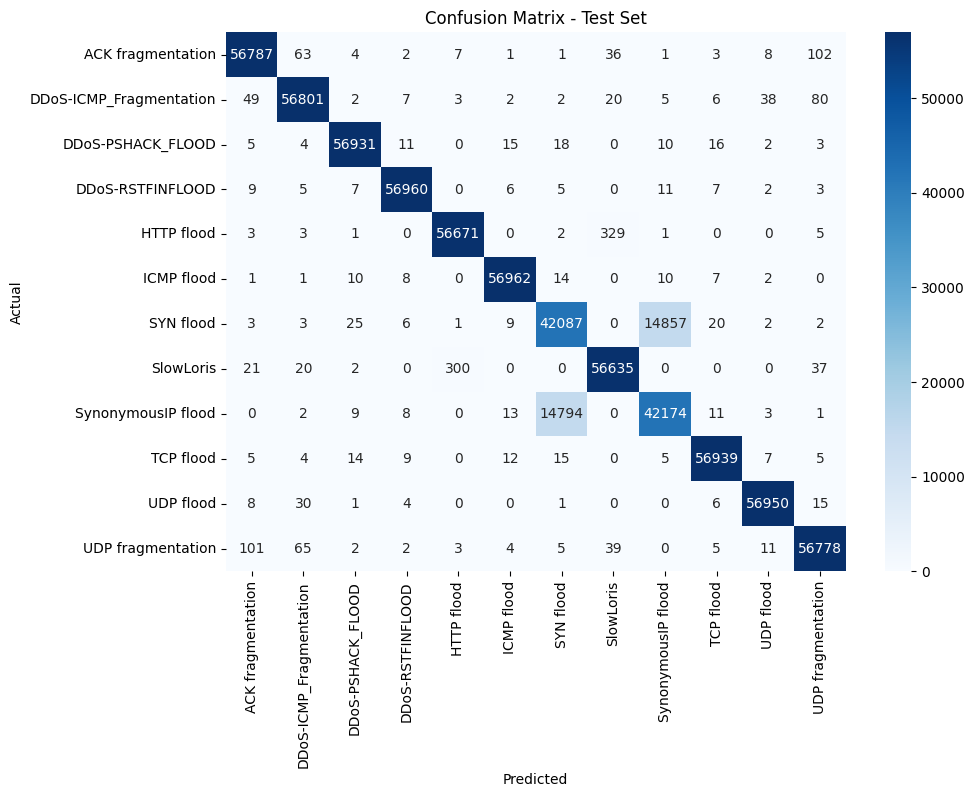

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Create Decision Tree using Gini Index
# -----------------------------
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf.fit(X_train, y_train)  # train on balanced training set

# -----------------------------
# Step 2: Make predictions
# -----------------------------
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

# -----------------------------
# Step 3: Evaluate performance
# -----------------------------
print("=== Training Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n=== Test Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# -----------------------------
# Training Set Confusion Matrix
# -----------------------------
cm_train = confusion_matrix(y_train, y_train_pred, labels=np.unique(y_train))
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Test Set Confusion Matrix
# -----------------------------
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Random forest classifier

=== Training Set Metrics ===
Accuracy: 0.9820
Classification Report:
                         precision    recall  f1-score   support

      ACK fragmentation       1.00      1.00      1.00    228060
DDoS-ICMP_Fragmentation       1.00      1.00      1.00    228060
      DDoS-PSHACK_FLOOD       1.00      1.00      1.00    228060
       DDoS-RSTFINFLOOD       1.00      1.00      1.00    228060
             HTTP flood       1.00      1.00      1.00    228060
             ICMP flood       1.00      1.00      1.00    228060
              SYN flood       0.98      0.80      0.88    228060
              SlowLoris       1.00      1.00      1.00    228060
     SynonymousIP flood       0.83      0.99      0.90    228060
              TCP flood       1.00      1.00      1.00    228060
              UDP flood       1.00      1.00      1.00    228060
      UDP fragmentation       1.00      1.00      1.00    228060

               accuracy                           0.98   2736720
              macro

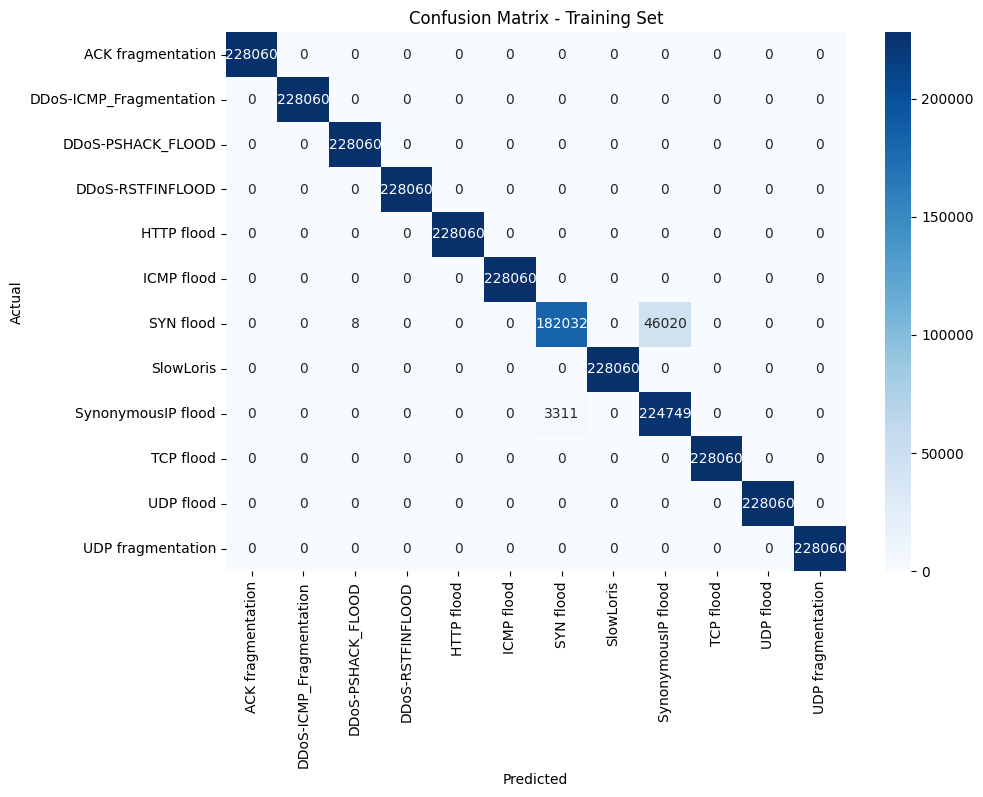

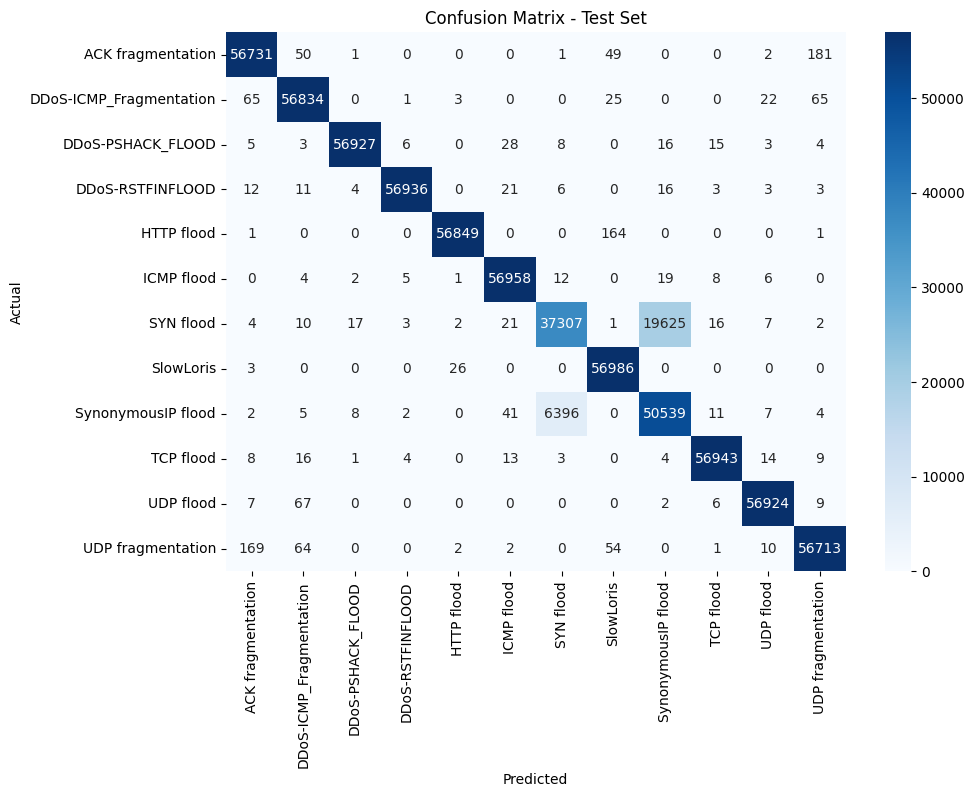

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Step 1: Create Random Forest classifier
# -----------------------------
rf_clf = RandomForestClassifier(
    n_estimators=200,       # number of trees
    criterion='gini',       # can also use 'entropy'
    max_depth=None,         # expand fully, or set a value like 20
    random_state=42,
    n_jobs=-1               # use all cores
)
rf_clf.fit(X_train, y_train)

# -----------------------------
# Step 2: Make predictions
# -----------------------------
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# -----------------------------
# Step 3: Evaluate performance
# -----------------------------
print("=== Training Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n=== Test Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# Step 4: Confusion Matrix Visualization (blue)
# -----------------------------
# Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=np.unique(y_train))
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Naive bayes

=== Training Set Metrics ===
Accuracy: 0.8953
Classification Report:
                         precision    recall  f1-score   support

      ACK fragmentation       0.98      0.97      0.97    228060
DDoS-ICMP_Fragmentation       0.97      0.99      0.98    228060
      DDoS-PSHACK_FLOOD       1.00      1.00      1.00    228060
       DDoS-RSTFINFLOOD       1.00      1.00      1.00    228060
             HTTP flood       0.77      0.89      0.83    228060
             ICMP flood       1.00      0.99      1.00    228060
              SYN flood       0.87      0.23      0.37    228060
              SlowLoris       0.85      0.75      0.80    228060
     SynonymousIP flood       0.56      0.96      0.71    228060
              TCP flood       1.00      0.99      1.00    228060
              UDP flood       1.00      0.99      0.99    228060
      UDP fragmentation       0.99      0.99      0.99    228060

               accuracy                           0.90   2736720
              macro

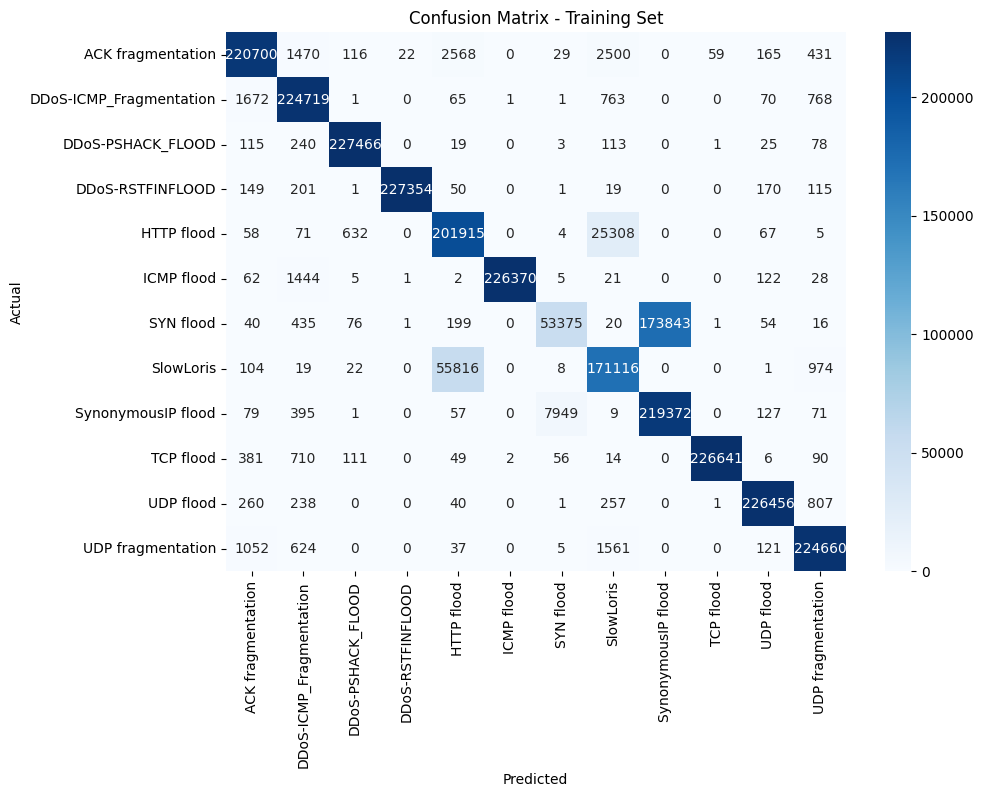

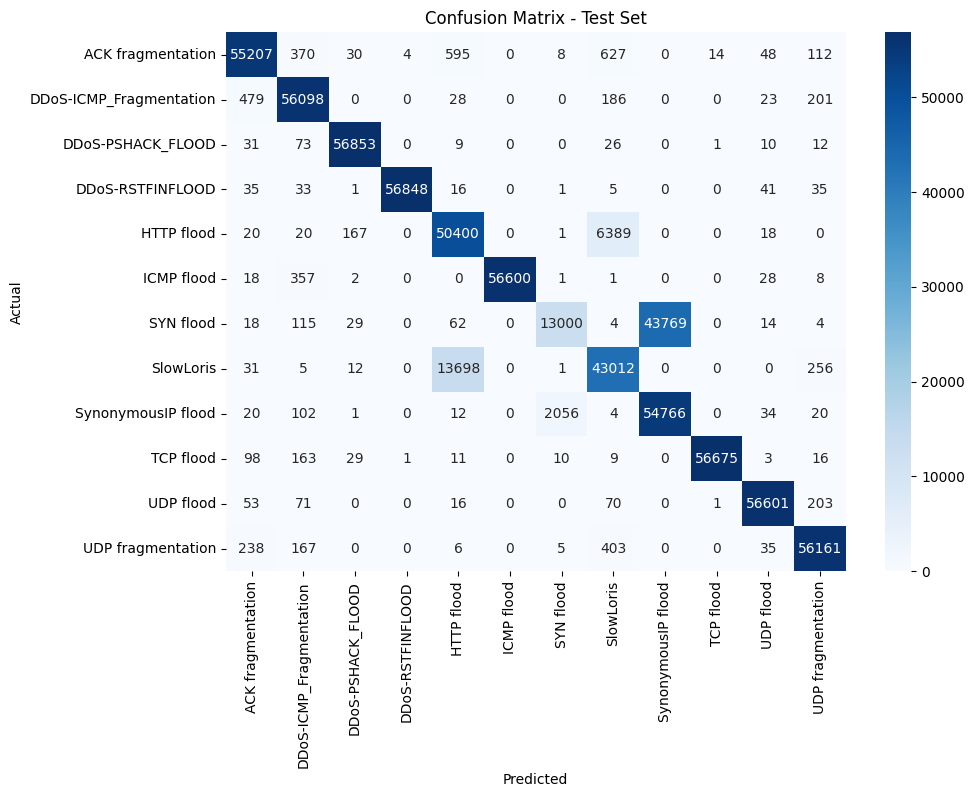

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Step 1: Create Gaussian Naive Bayes classifier
# -----------------------------
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# -----------------------------
# Step 2: Make predictions
# -----------------------------
y_train_pred = nb_clf.predict(X_train)
y_test_pred = nb_clf.predict(X_test)

# -----------------------------
# Step 3: Evaluate performance
# -----------------------------
print("=== Training Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n=== Test Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# Step 4: Confusion Matrix Visualization (blue)
# -----------------------------
# Training Set
cm_train = confusion_matrix(y_train, y_train_pred, labels=np.unique(y_train))
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train), cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Set
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# XGBOOST

=== Training Set Metrics ===
Accuracy: 0.9611
Classification Report:
                         precision    recall  f1-score   support

      ACK fragmentation       1.00      1.00      1.00    228060
DDoS-ICMP_Fragmentation       1.00      1.00      1.00    228060
      DDoS-PSHACK_FLOOD       1.00      1.00      1.00    228060
       DDoS-RSTFINFLOOD       1.00      1.00      1.00    228060
             HTTP flood       1.00      1.00      1.00    228060
             ICMP flood       1.00      1.00      1.00    228060
              SYN flood       0.87      0.64      0.74    228060
              SlowLoris       1.00      1.00      1.00    228060
     SynonymousIP flood       0.71      0.90      0.80    228060
              TCP flood       1.00      1.00      1.00    228060
              UDP flood       1.00      1.00      1.00    228060
      UDP fragmentation       1.00      1.00      1.00    228060

               accuracy                           0.96   2736720
              macro

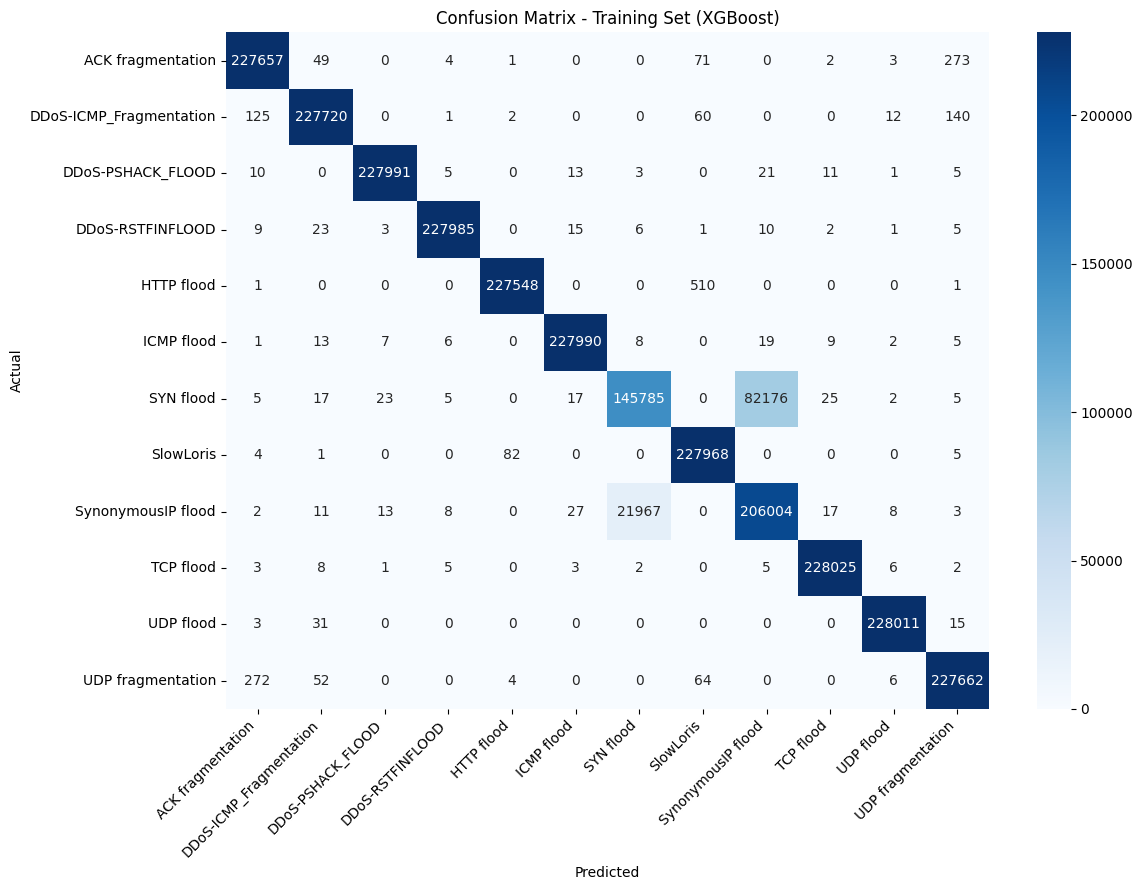

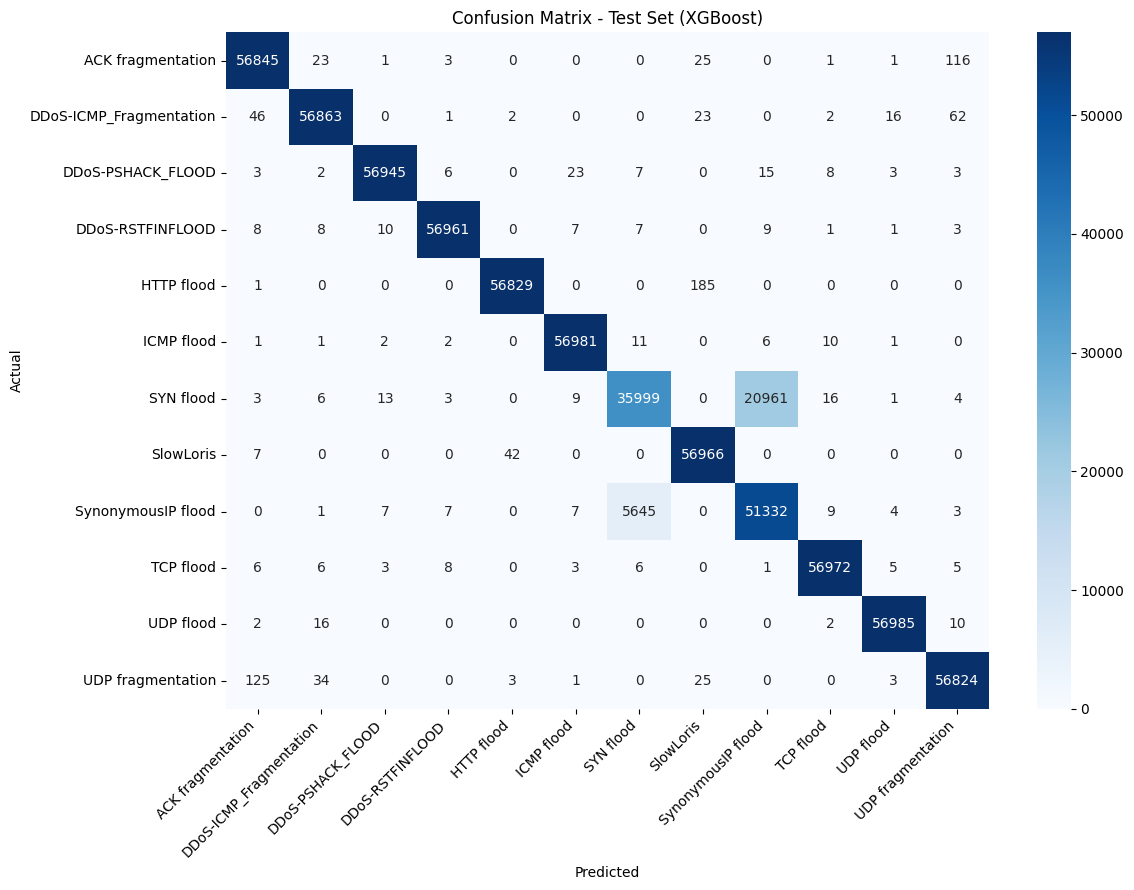

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Make sure lb exists. If you have an earlier LabelEncoder (lb) fitted, use it.
# If not, fit a new one on all possible labels:
# lb = LabelEncoder()
# lb.fit(y_balanced_labels)   # only if lb not already fitted

# 1) Encode train/test labels to integers
y_train_enc = lb.transform(y_train)   # y_train are strings like 'ACK fragmentation'
y_test_enc  = lb.transform(y_test)

# 2) Create XGBoost classifier
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# 3) Train on encoded labels
xgb_clf.fit(X_train, y_train_enc)

# 4) Predict (will return encoded ints)
y_train_pred_enc = xgb_clf.predict(X_train)
y_test_pred_enc  = xgb_clf.predict(X_test)

# 5) Decode predictions back to original attack names
y_train_pred = lb.inverse_transform(y_train_pred_enc)
y_test_pred  = lb.inverse_transform(y_test_pred_enc)

# 6) Evaluate (use decoded labels for readable reports)
print("=== Training Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

print("\n=== Test Set Metrics ===")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# 7) Confusion matrices (blue)
unique_labels = np.unique(y_test)  # list of attack names (strings) in sorted order

# Training CM
cm_train = confusion_matrix(y_train, y_train_pred, labels=unique_labels)
plt.figure(figsize=(12,9))
sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels, cmap="Blues")
plt.title("Confusion Matrix - Training Set (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Test CM
cm_test = confusion_matrix(y_test, y_test_pred, labels=unique_labels)
plt.figure(figsize=(12,9))
sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=unique_labels, yticklabels=unique_labels, cmap="Blues")
plt.title("Confusion Matrix - Test Set (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.383178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8243
[LightGBM] [Info] Number of data points in the train set: 2736720, number of used features: 40
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.4849

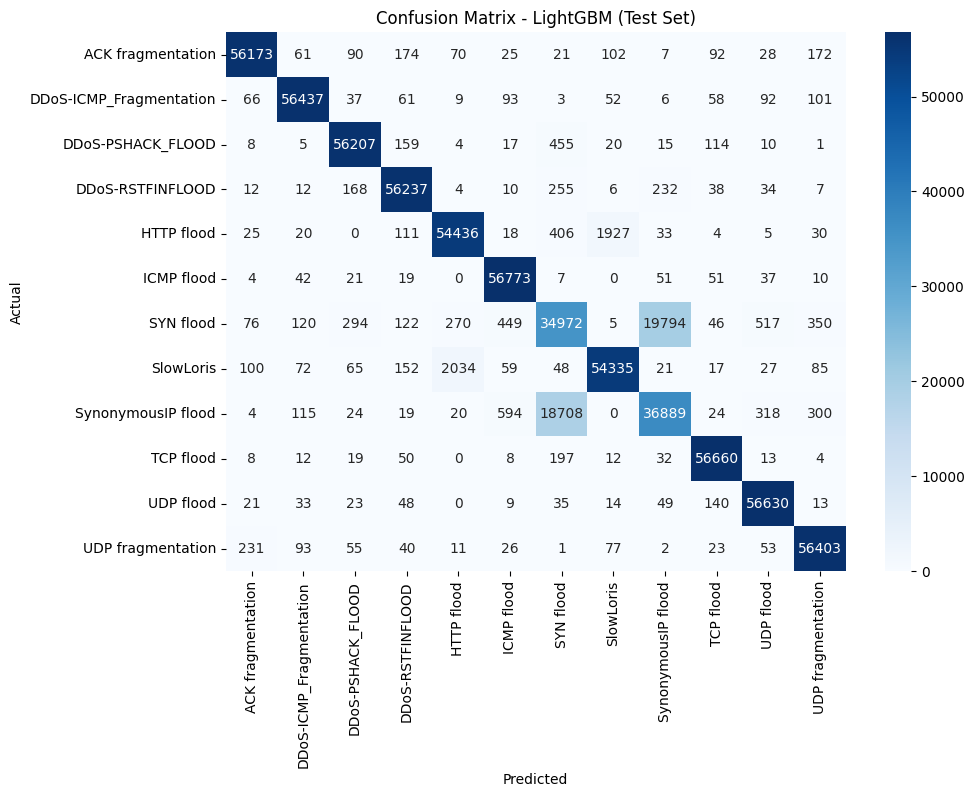

In [16]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Train LightGBM Classifier
# -----------------------------
lgb_clf = lgb.LGBMClassifier(
    boosting_type='gbdt',
    objective='multiclass',
    num_class=len(np.unique(y)),   # Number of classes
    metric='multi_logloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

lgb_clf.fit(X_train, y_train)

# -----------------------------
# Predictions
# -----------------------------
y_train_pred = lgb_clf.predict(X_train)
y_test_pred = lgb_clf.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("LightGBM Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("LightGBM Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# -----------------------------
# Confusion Matrix Visualization
# -----------------------------
cm_test = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt='d',
            cmap="Blues", xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - LightGBM (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
